[Altair: Multi Series Line Chart](https://altair-viz.github.io/gallery/multi_series_line.html)

In [12]:
import pandas as pd
import altair as alt
from vega_datasets import data
from qgrid import show_grid

pd.options.display.max_rows=100
#alt.themes.enable('opaque')
#alt.themes.enable('default')

In [13]:
source = data.stocks()

show_grid((
    source
    .assign(mes = source['date'].dt.month)
    .assign(dia = source['date'].dt.day)
    .assign(ano = source['date'].dt.year)
    .assign(weekday = source['date'].dt.weekday)
))

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

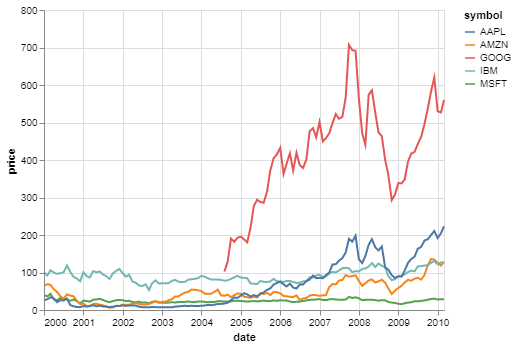

In [14]:
alt.Chart(source).mark_line().encode(
    x='date',
    y='price',
    color='symbol'
)

# Aggregating by month

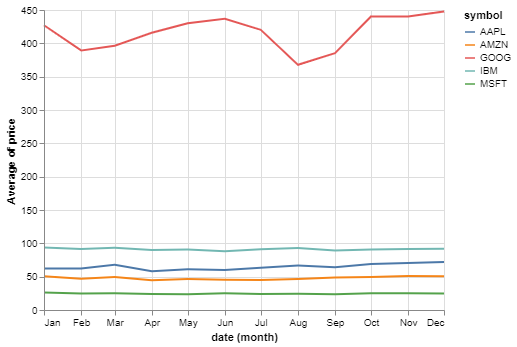

In [15]:
alt.Chart(source).mark_line().encode(
    x='month(date)',
    y='average(price)',
    color='symbol'
)

# Aggregating by year and month

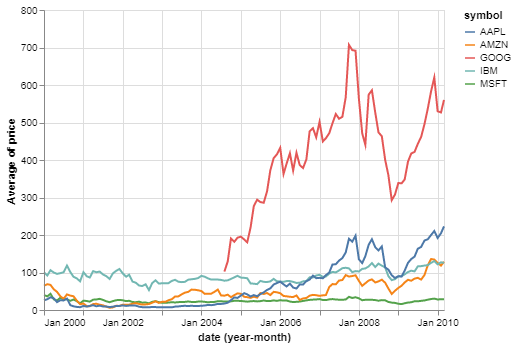

In [16]:
alt.Chart(source).mark_line().encode(
    x='yearmonth(date)',
    y='average(price)',
    color='symbol'
)

# Faceting

* 1st way

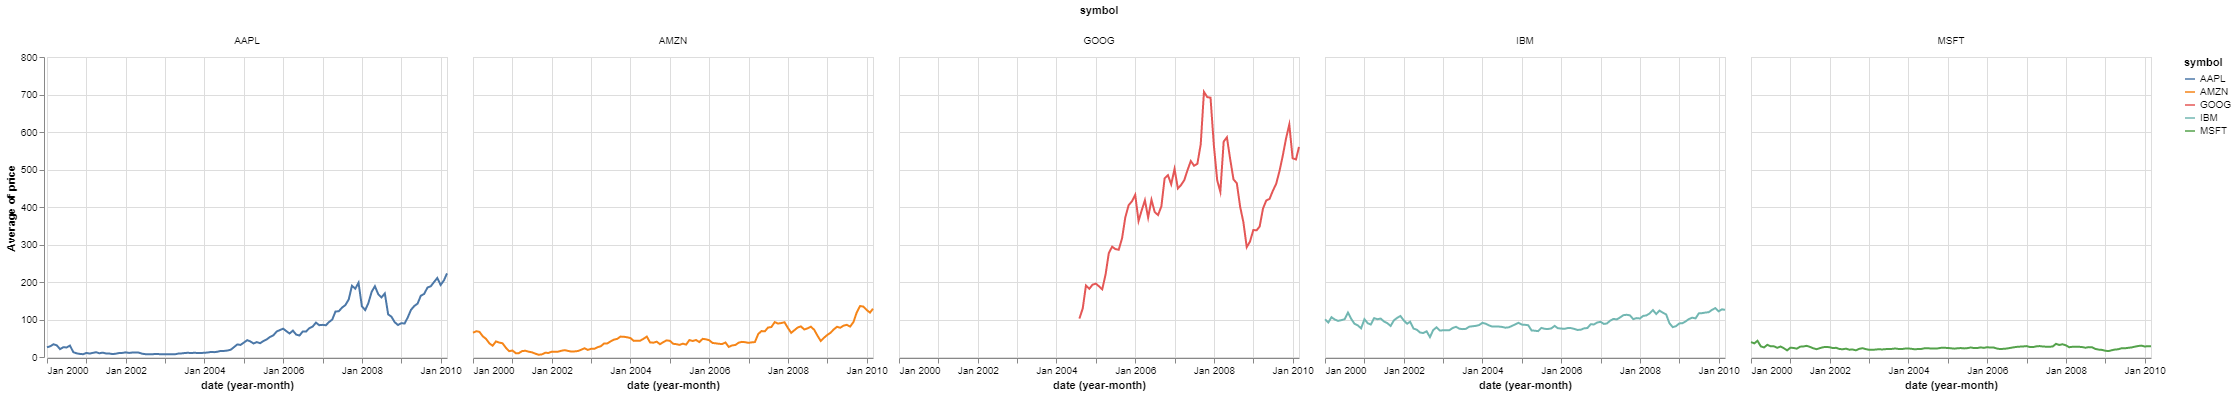

In [17]:
alt.Chart(source).mark_line().encode(
    x='yearmonth(date)',
    y='average(price)',
    color='symbol'
).facet(column='symbol')

* 2nd way

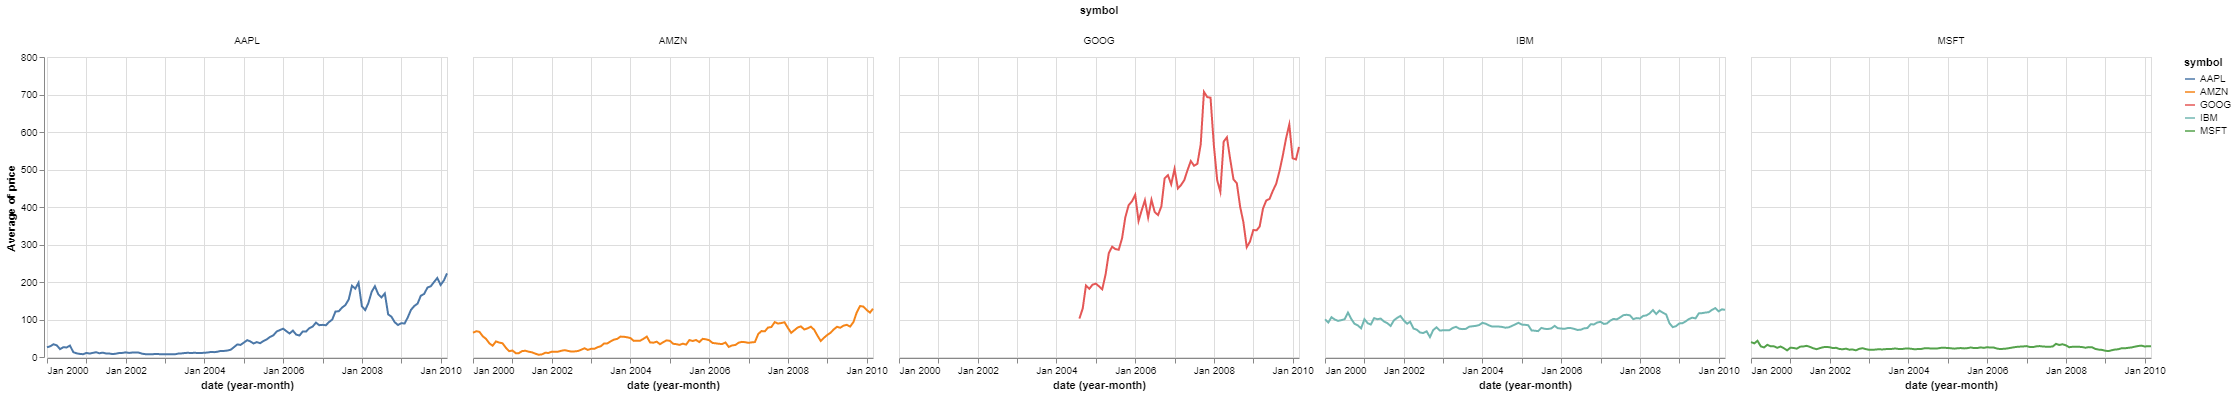

In [18]:
alt.Chart(source).mark_line().encode(
    x='yearmonth(date)',
    y='average(price)',
    color='symbol',
    column='symbol'
)

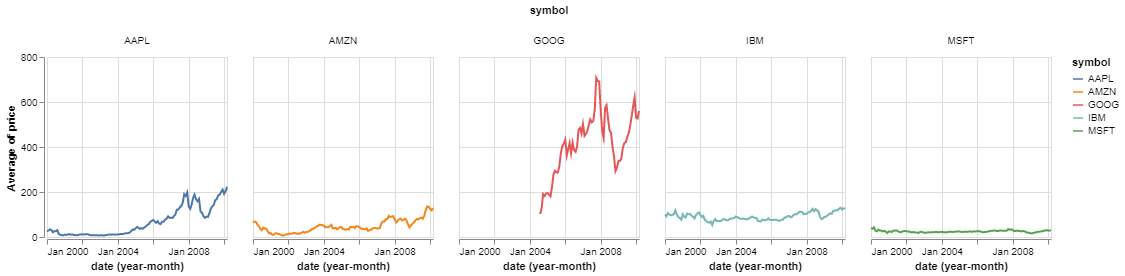

In [19]:
alt.Chart(source).mark_line().encode(
    x='yearmonth(date)',
    y='average(price)',
    color='symbol',
    column='symbol'
).properties(
    width=180,
    height=180
)

# Line Charts with Layered Aggregates

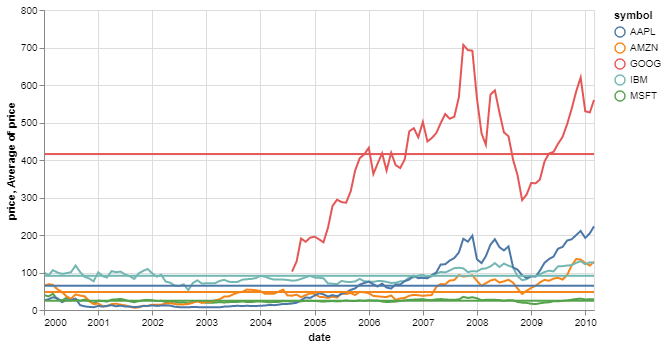

In [20]:
base = alt.Chart(source).properties(width=550)

line = base.mark_line().encode(
    x='date',
    y='price',
    color='symbol'
)

rule = base.mark_rule().encode(
    y='average(price)',
    color='symbol',
    size=alt.value(2)
)

line + rule

# Plotly Express

[Plotly Express](https://plot.ly/python/facet-plots/)

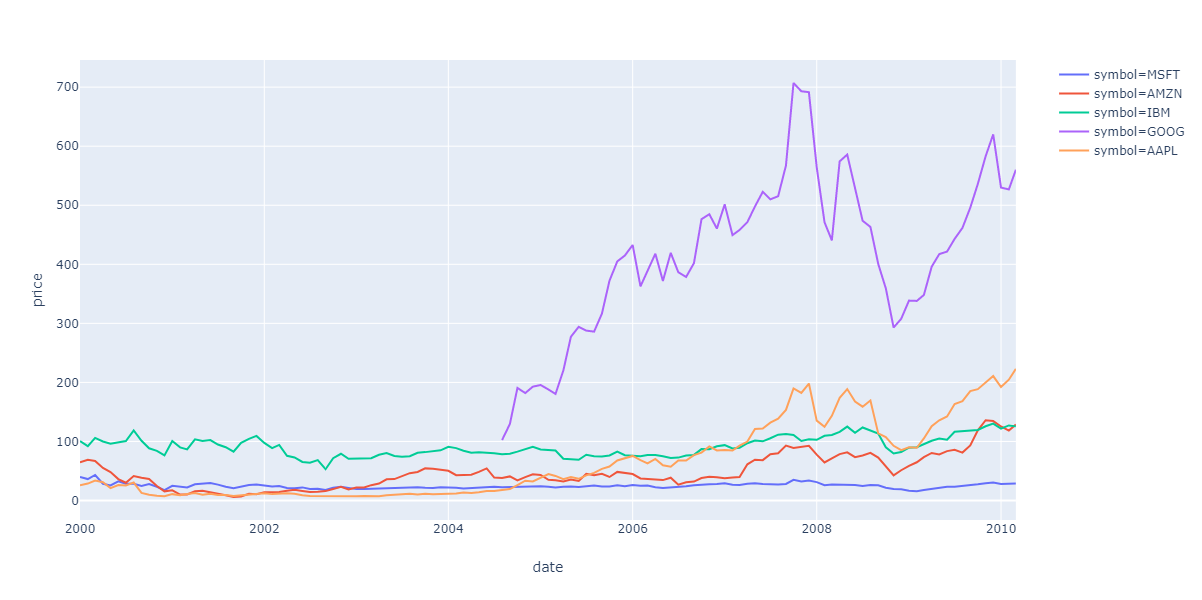

In [52]:
import plotly.express as px

fig = px.line(source, x='date', y='price', color='symbol')
fig.show()

# Aggregating by Month

In [48]:
source_grouped_by_month = (
    source
    .assign(month=source['date'].dt.month_name())
    .groupby(['symbol','month'], as_index=False)
    .agg({'price': 'mean'})
)

In [49]:
source_grouped_by_month.head()

,symbol,month,price
0,AAPL,April,58.192000
1,AAPL,August,66.664000
2,AAPL,December,71.933000
3,AAPL,February,62.273636
4,AAPL,January,62.255455


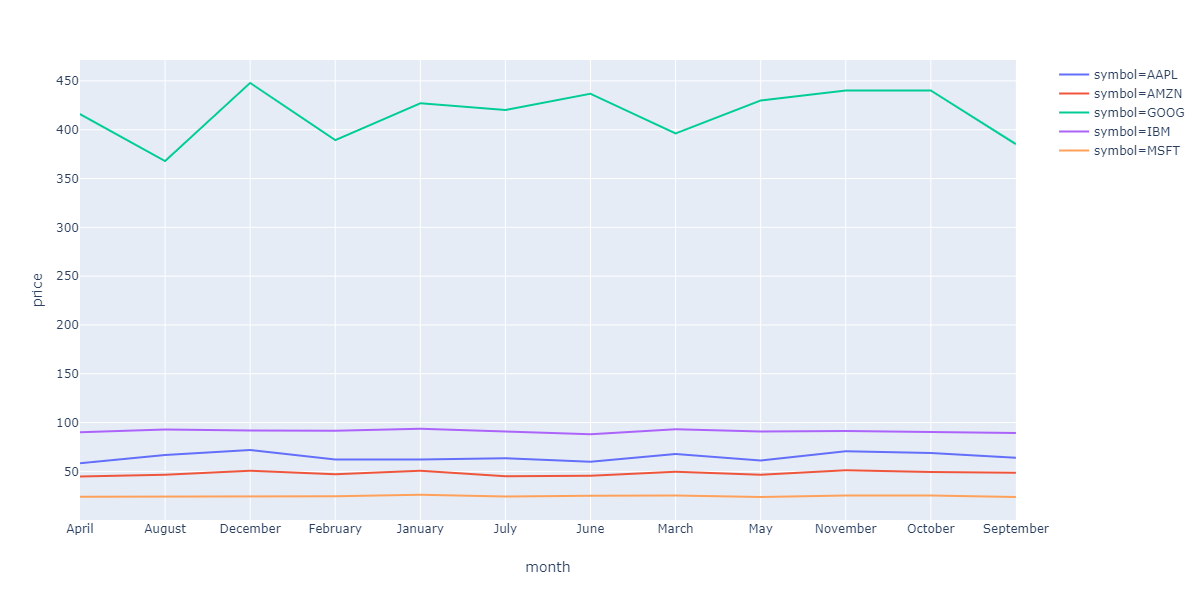

In [51]:
fig = px.line(source_grouped_by_month, x='month', y='price', color='symbol')
fig.show()

# Aggregating by Year and Month

In [91]:
source_grouped_by_year_month = (
    source
    .assign(month=source['date'].dt.month_name())
    .assign(year=source['date'].dt.year)
    .groupby(['symbol','year', 'month'], as_index=False)
    .agg({'price': 'mean'})
    .assign(date=lambda x: x.month + ' ' + x.year.map(str))
)

In [92]:
source_grouped_by_year_month.head()

,symbol,year,month,price,date
0,AAPL,2000,April,31.01,April 2000
1,AAPL,2000,August,30.47,August 2000
2,AAPL,2000,December,7.44,December 2000
3,AAPL,2000,February,28.66,February 2000
4,AAPL,2000,January,25.94,January 2000


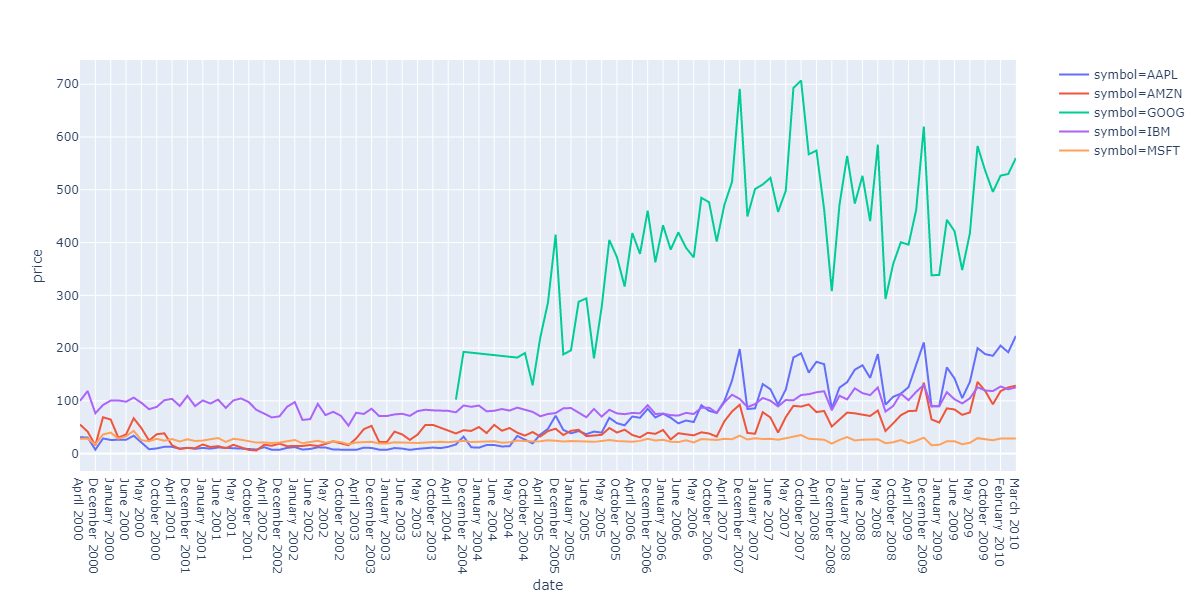

In [93]:
fig = px.line(source_grouped_by_year_month, x='date', y='price', color='symbol')
fig.show()